In [1]:
from datetime import datetime
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.metrics import accuracy_score, log_loss, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [3]:
training_sg = pd.read_pickle('../data/te_sg_df_training.pickle')
testing_sg = pd.read_pickle('../data/te_sg_df_testing.pickle')

In [4]:
X = training_sg.iloc[:, 1:-1].values
y = training_sg.label.map({'true':1, 'unreliable':0}).values
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel="rbf", C=1, probability=True,
        class_weight='balanced', random_state=42),
    NuSVC(nu=0.5, kernel='rbf', probability=True,
          class_weight='balanced', random_state=42),
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    RandomForestClassifier(class_weight='balanced', random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    GaussianNB(),
    LinearDiscriminantAnalysis()]


  0%|          | 0/10 [00:00<?, ?it/s]

KNeighborsClassifier
****Results****
Accuracy: 92.3873%
Weighted F1: 92.3790%


 10%|█         | 1/10 [00:01<00:13,  1.53s/it]

Log Loss: 0.8624451805217432
SVC
****Results****
Accuracy: 92.3134%
Weighted F1: 92.3116%


 20%|██        | 2/10 [00:52<04:05, 30.70s/it]

Log Loss: 0.17596319836452495
NuSVC
****Results****
Accuracy: 90.7613%
Weighted F1: 90.7485%


 30%|███       | 3/10 [02:27<06:58, 59.81s/it]

Log Loss: 0.22287742472124408


 40%|████      | 4/10 [02:30<03:45, 37.63s/it]

DecisionTreeClassifier
****Results****
Accuracy: 92.2395%
Weighted F1: 92.2373%
Log Loss: 2.6803928466116944
RandomForestClassifier
****Results****
Accuracy: 95.1959%
Weighted F1: 95.1961%


 50%|█████     | 5/10 [02:46<02:27, 29.58s/it]

Log Loss: 0.12329945982130133
AdaBoostClassifier
****Results****
Accuracy: 95.5654%


 60%|██████    | 6/10 [03:14<01:56, 29.20s/it]

Weighted F1: 95.5649%
Log Loss: 0.5874116885488366


 70%|███████   | 7/10 [05:18<03:01, 60.35s/it]

GradientBoostingClassifier
****Results****
Accuracy: 96.0089%
Weighted F1: 96.0115%
Log Loss: 0.08997653284419437


 90%|█████████ | 9/10 [05:36<00:32, 32.11s/it]

XGBClassifier
****Results****
Accuracy: 96.7480%
Weighted F1: 96.7486%
Log Loss: 0.0887162762767444
GaussianNB
****Results****
Accuracy: 79.3052%
Weighted F1: 79.3278%
Log Loss: 5.491235074010976


100%|██████████| 10/10 [05:37<00:00, 33.77s/it]

LinearDiscriminantAnalysis
****Results****
Accuracy: 94.7524%
Weighted F1: 94.7407%
Log Loss: 0.13269028631051438
⌚Process took: 0:05:37.710237


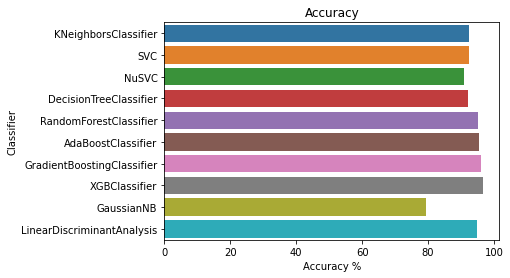

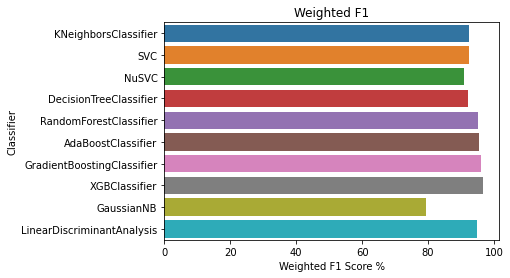

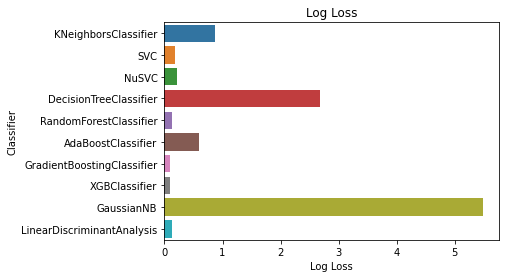

In [6]:
log_cols = ["Classifier", "Accuracy", "Weighted F1", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

t1 = datetime.now()

for clf in tqdm(classifiers):
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('****Results****')
    train_predictions = clf.predict(X_val)
    acc = accuracy_score(y_val, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    train_predictions = clf.predict(X_val)
    f1 = f1_score(y_val, train_predictions, average='weighted')
    print("Weighted F1: {:.4%}".format(f1))
    train_predictions = clf.predict_proba(X_val)
    ll = log_loss(y_val, train_predictions)
    print("Log Loss: {}".format(ll))
    log_entry = pd.DataFrame([[name, acc*100, f1*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    print("="*30)

t2 = datetime.now() - t1
print('⌚Process took:', t2)

sns.barplot(x='Accuracy', y='Classifier', data=log)
plt.xlabel('Accuracy %')
plt.title('Accuracy')
plt.show()
sns.barplot(x='Weighted F1', y='Classifier', data=log)
plt.xlabel('Weighted F1 Score %')
plt.title('Weighted F1')
plt.show()
sns.barplot(x='Log Loss', y='Classifier', data=log)
plt.xlabel('Log Loss')
plt.title('Log Loss')
plt.show()

In [7]:
log

,Classifier,Accuracy,Weighted F1,Log Loss
0,KNeighborsClassifier,92.387288,92.379026,0.862445
0,SVC,92.313378,92.311638,0.175963
0,NuSVC,90.761271,90.748452,0.222877
0,DecisionTreeClassifier,92.239468,92.237250,2.680393
0,RandomForestClassifier,95.195861,95.196120,0.123299
0,AdaBoostClassifier,95.565410,95.564918,0.587412
0,GradientBoostingClassifier,96.008869,96.011474,0.089977
0,XGBClassifier,96.747967,96.748646,0.088716
0,GaussianNB,79.305248,79.327784,5.491235
0,LinearDiscriminantAnalysis,94.752402,94.740742,0.132690
